# Day Three: Analyzing Networks


In [3]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Warm-up question

In yesterday's evening activity we considered a basic network and how we could use it to conduct contact tracing. The adjacency matrix simply captured _whether or not_ people had interacted with one another. However, in real life, there are _levels_ of interaction. A high five should be able to be distinguished from a long hug. Here's a reminder of what an example adjacency matrix looks like.

$$\begin{bmatrix}  0 & 1 & 1 & 1 & 0 & 1 & 1 \\ 1 & 0 & 1 & 0 & 1 & 0 & 1 \\ 0 & 1 & 0 & 1 & 1 & 1 & 1 \\ 0 & 1 & 1 & 0 & 0 & 0 & 1 \\ 1 & 1 & 0 & 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 & 1 & 0 & 0\\  1 & 1 & 0 & 0 & 1 & 1 &  0\end{bmatrix}$$

How would you change the adjacency matrix to represent different types of interactions? Would you inform every contact with the same urgency? Talk about this with your groups.

_Hint: Imagine that we "rated" levels of interaction on a scale from 1 to 5, where 1's meant "I waved at someone from afar" and 5 meant "I hugged someone for 5 minutes"._

## Labeling Nodes using `networkx`

Malcolm pointed out that it might be nice to label nodes according to their names, so that when we plot a network we see names instead of IDs!

The way to do that is by defining a _dictionary_ object that defines what to label each node.

A dictionary is a python object that acts as a way to "lookup" the meaning of things. Dictionaries are defined by _key, value_ pairs. 

I like to think of dictionaries in the following way: if I had a secret language I wanted to use to communicate with a friend, I would also have to provide the decoder to them.

For example, I could ask my friend, "Good jeans plant man?", and then provide a decoder, or a _**dictionary**_ that looked like `decoder = {'jeans': 'are', 'plant': 'you, 'good': 'how', 'man': 'today'}`. My friend could then use the dictionary to decode the message by looking up the words I gave them in the dictionary: `print(decoder['good'], decoder['jeans'], decoder['plant'], decoder['man'], '?')`

In [1]:
decoder = {'jeans': 'are', 'plant': 'you', 'good': 'how', 'man': 'today'}
print(decoder['good'], decoder['jeans'], decoder['plant'], decoder['man'], '?')

how are you today ?


For our sake, we only need to _define_ the dictionary for the sake of relabeling our network. Using the same `contacts.csv` adjacency matrix, let's create a dictionary! 

In [4]:
folder = ""
file = "contacts"
ext = ".csv"
contacts = np.genfromtxt(folder+file+ext, dtype=int, delimiter=',', skip_header=False)


names = np.array(['Sharon', 'Scott', 'Laura', 'Alice', 'Gonzalo', 'Sebastian', 'Lorenzo', 
                  'Penelope', 'Oscar', 'Faye', 'Miles', 'Taylor', 'Libby', 'Jojo', 'Julie'])

dictOfNames = { i : names[i] for i in range(0, len(names) ) }

contact_network = nx.from_numpy_matrix(contacts)

In [5]:
dictOfNames

{0: 'Sharon',
 1: 'Scott',
 2: 'Laura',
 3: 'Alice',
 4: 'Gonzalo',
 5: 'Sebastian',
 6: 'Lorenzo',
 7: 'Penelope',
 8: 'Oscar',
 9: 'Faye',
 10: 'Miles',
 11: 'Taylor',
 12: 'Libby',
 13: 'Jojo',
 14: 'Julie'}

In [6]:
contact_network = nx.relabel_nodes(contact_network, dictOfNames)

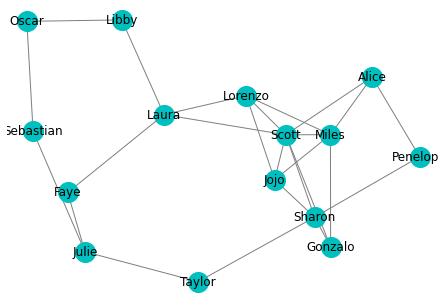

In [7]:
pos = nx.spring_layout(contact_network, k=0.25,iterations=20)
nx.draw(contact_network, pos, node_color='c', node_size=400, edge_color='grey', with_labels=True)

## Zachary's Karate Club
The example we'll be using to talk about networks today is a _classic_ network science example. In fact, it's so classic that at a network science conference, a travelling trophy is awarded to the first person who uses it in an example during their presentation. 

The story behind Zachary's Karate Club is really amazing.

In [8]:
Karate = nx.karate_club_graph()

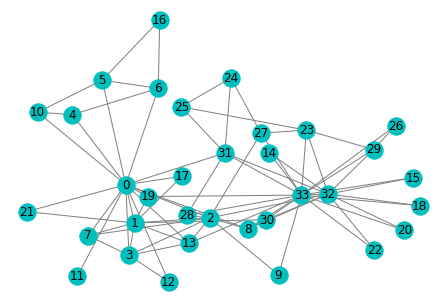

In [9]:
k_pos = nx.spring_layout(Karate, k=0.25,iterations=20)
nx.draw(Karate, k_pos, node_color='c', node_size=300, edge_color='grey', with_labels=True)

In [10]:
for node in Karate.nodes():
    print('node', node, 'is in ', Karate.nodes[node]['club'],'`s', 'club')

node 0 is in  Mr. Hi `s club
node 1 is in  Mr. Hi `s club
node 2 is in  Mr. Hi `s club
node 3 is in  Mr. Hi `s club
node 4 is in  Mr. Hi `s club
node 5 is in  Mr. Hi `s club
node 6 is in  Mr. Hi `s club
node 7 is in  Mr. Hi `s club
node 8 is in  Mr. Hi `s club
node 9 is in  Officer `s club
node 10 is in  Mr. Hi `s club
node 11 is in  Mr. Hi `s club
node 12 is in  Mr. Hi `s club
node 13 is in  Mr. Hi `s club
node 14 is in  Officer `s club
node 15 is in  Officer `s club
node 16 is in  Mr. Hi `s club
node 17 is in  Mr. Hi `s club
node 18 is in  Officer `s club
node 19 is in  Mr. Hi `s club
node 20 is in  Officer `s club
node 21 is in  Mr. Hi `s club
node 22 is in  Officer `s club
node 23 is in  Officer `s club
node 24 is in  Officer `s club
node 25 is in  Officer `s club
node 26 is in  Officer `s club
node 27 is in  Officer `s club
node 28 is in  Officer `s club
node 29 is in  Officer `s club
node 30 is in  Officer `s club
node 31 is in  Officer `s club
node 32 is in  Officer `s club
node

## Centrality in Networks
There are lots of ways to measure how "central" a given node is in a graph. Knowing the most central nodes can tell us a lot about a community or a network. Is that person a spiritual or political leader? The most popular person in the class? Is it the train stop with the most transfers?

### Degree centrality
We might be tempted to think that the node with the highest degree is "the most important" in some respect. If we were to measure centrality of nodes by counting the _degrees_ of the node (how many edges are going into or out of the node), this would be called _**degree centrality**_ However, consider the following example network. Luckily, `networkx` tells us the degree centrality of every node in the network with the `degree_centrality()` function.
<img src="centrality.png" width = 400>
In this network the node with highest degree is the one highlighted pink. If we were measuring centrality of nodes with _degree centrality_ it would have the highest centrality. 

### Question 
Consider the node highlighted dark blue. What's special about it?

### Betweenness centrality
Informally, a node has high _**betweenness**_ if it lies on paths (particularly short paths) between many pairs of other nodes. Luckily, `networkx` tells us the eigenvector centrality of every node in the network with the `betweenness_centrality()` function.Without going into the math of it, do you think the dark blue or the pink node in the above graph has higher _betweenness centrality_? 

### Eigenvector centrality
Eigenvector centrality is a measure of importance based on _the other important nodes_ it's connected to. Luckily, `networkx` tells us the eigenvector centrality of every node in the network with the `eigenvector_centrality()` function.

_**Interestingly,** Google's Pagerank algorithm is a variant of Eigenvector centrality algorithm._

In [11]:
a = nx.degree_centrality(Karate)

b = nx.eigenvector_centrality(Karate)

c = nx.betweenness_centrality(Karate)

print('The person with highest degree centrality is', max(a, key=lambda key: a[key]))
print('The person with highest eigenvector centrality is', max(b, key=lambda key: b[key]))
print('The person with highest betweenness centrality is', max(c, key=lambda key: c[key]))

The person with highest degree centrality is 33
The person with highest eigenvector centrality is 33
The person with highest betweenness centrality is 0


## DISCUSSION:
Was there anything confusing about centrality that you'd like to go over?
pollev.com/izabelaguiar204

## Communities in Networks

Think about one of the social networks you've been in, and think about the communities that probably make up that network. For example, think about the cliques depicted in any american high school movie--the geeks, the theatre kids, the art kids, the goths, the popular kids. On the other hand, if we had a network describing how different proteins interacted with each other, maybe the communities within the network would show us different groups of proteins! 

**Lots and LOTS** of research has been done on how to find communities in netwoks, and there are sooo many methods for finding and identifying them. One of the many methods has been developed by Michelle Girvan and Mark Newman called the [Girvan-Newman Algorithm](https://en.wikipedia.org/wiki/Girvan–Newman_algorithm#cite_note-newman-1). We won't go into the specifics (although there is a great description on that wikipedia page!), as the Girvan-Newman algorithm has already been defined in `networkx`. 

In [12]:
comm = nx.algorithms.community.girvan_newman(Karate)
A = tuple(sorted(c) for c in next(comm))

In [13]:
import matplotlib.cm as cmx
def Plot_Comm(Network, A, position = 0):
    cmap = cmx.get_cmap(name='rainbow')
    N = len(Network.nodes())
    K = len(A)
    color_map = ['k']*N
    for i in range(len(A)):
        for j in range(len(A[i])):
            color_map[ A[i][j] ] = cmap(i/K)
    if position == 0:
        pos = nx.spring_layout(Network, k=0.25,iterations=20)
    else:
        pos = position
    fig = plt.figure()
    nx.draw(Network, pos, node_color=color_map, node_size=300, edge_color='grey', with_labels=True)
    plt.show()
    return

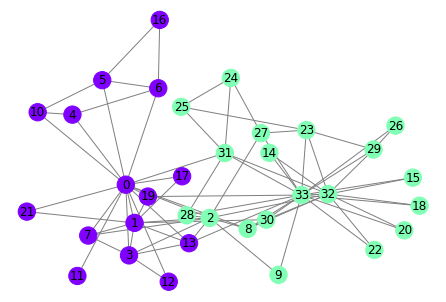

In [14]:
Plot_Comm(Karate, A, k_pos)

In [16]:
Karate.nodes[8]['club']

'Mr. Hi'

## Triadic Closure
If two people in a social network have a friend in common, then there is an increased likelihood that they will become friends themselves at some point in the future.



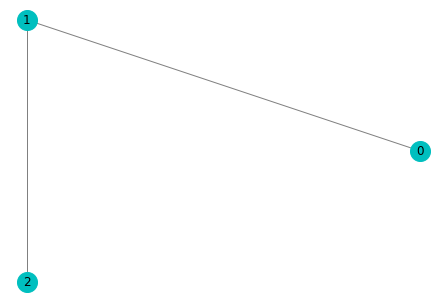

In [17]:
Tri = np.array([ [0, 1, 0], [1, 0, 1], [0, 1, 0] ])
Tri_network = nx.from_numpy_matrix(Tri)
nx.draw_circular(Tri_network, node_color='c', node_size=400, edge_color='grey', with_labels=True)

The _**clustering coefficient**_ of a node A is defined as the probability that two randomly selected friends of A are friends with each other. 

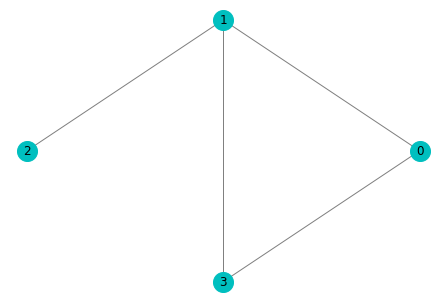

In [18]:
Tri = np.array([ [0, 1, 0, 1], [1, 0, 1, 1], [0, 1, 0, 0], [1, 1, 0, 0] ])
Tri_network = nx.from_numpy_matrix(Tri)
nx.draw_circular(Tri_network, node_color='c', node_size=400, edge_color='grey', with_labels=True)

## QUESTION

**What is the clustering coefficient of node 1?**

The pairs of friends are (2, 3) (2, 0) and (3, 0). Only one of these pairs of friends are friends with each other, so the clustering coefficient of node 1 is $\frac{1}{3}$.

In [19]:
clustering = nx.algorithms.clustering(Karate)
print('The node with lowest clustering coefficient is', min(clustering, key=lambda key: clustering[key]))

average_cc = nx.algorithms.average_clustering(Karate)
print('The average clustering coefficient for the Karate network is ', average_cc)

The node with lowest clustering coefficient is 9
The average clustering coefficient for the Karate network is  0.5706384782076823


A clustering coefficient of a node in a social network can be an important indicator of many things in a community.

> This premise is based in theories dating back to early work in social psychology; it also has empirical reflections that show up in natural but troubling ways in public-health data. For example, Bearman and Moody have found that teenage girls who have a low clustering coefficient in their network of friends are significantly more likely to contemplate suicide than those whose clustering coefficient is high.

### Group Discussion
If you were studying a social network and found a low clustering coefficient in some members of the network, how would you interpret it? Would it be an indicator of a healthy or unhealthy community? What could you do to try to change it? 
